In [27]:
%matplotlib widget

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from SSA_Decomposition import ssa_decomposition

font = {'size': 12}
matplotlib.rc('font', **font)

In [28]:
# The PPG signal (sampled at 25Hz)
data_csv = pd.read_csv('ppg.csv')
fs = 25
# Extract ppg and acceleromter signals between 200s and 400s
ppg = data_csv['ppg'][200*fs:400*fs].to_numpy()
acc_x = data_csv['acc_x'][200*fs:400*fs].to_numpy()
acc_y = data_csv['acc_y'][200*fs:400*fs].to_numpy()
acc_z = data_csv['acc_z'][200*fs:400*fs].to_numpy()
acc_norm = np.sqrt(acc_x*acc_x+acc_y*acc_y+acc_z*acc_z)

time = np.arange(0, len(ppg)/fs, 1/fs)

Text(0.5, 0, 'Time (s)')

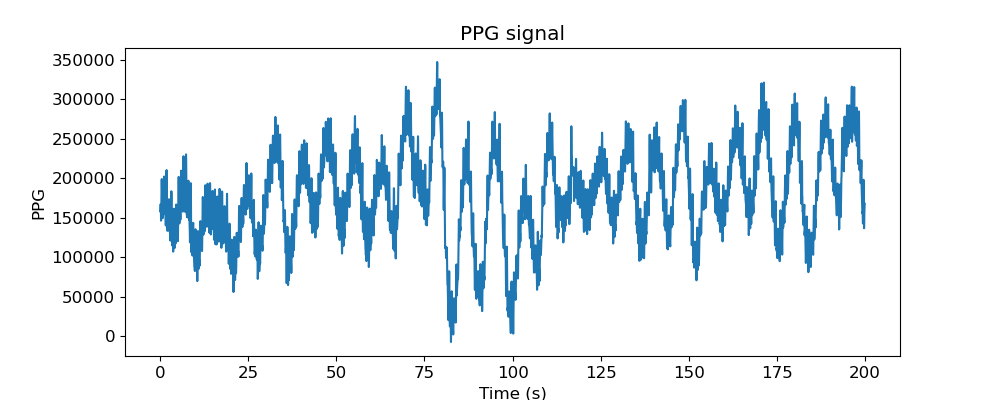

In [29]:
# Plot data
fig = plt.figure(figsize=(10,4))
plt.plot(time, ppg)
plt.title('PPG signal')
plt.ylabel('PPG')
plt.xlabel('Time (s)')

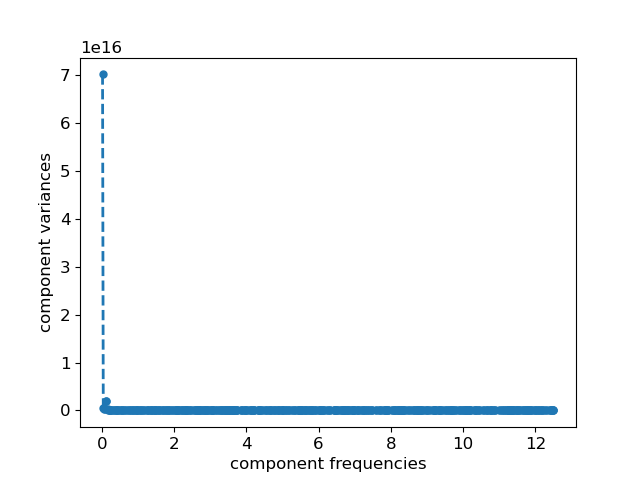

In [ ]:
# Find a window length L, so that the first component obtained using the function SSA_decomposition 
# corresponds to the long-term drift (baseline) on both ppg and accelerometer signals.

# First SSA decomposition to extract long term drift
# Find the length L in samples, so that SVD first component corresponds to
# long term drift signal.
L = 500  # Example value, adjust as needed
# Decompose PPG signal
Y_1, fc_1, sig_1 = ssa_decomposition(ppg, L, fs, 2)

Text(0.5, 0, 'Time (s)')

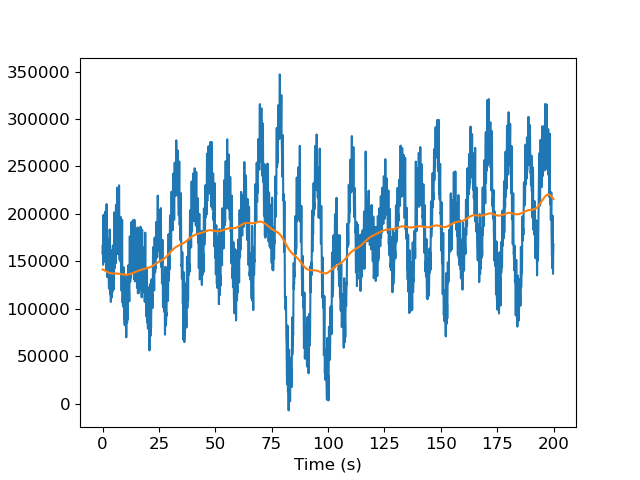

In [73]:
# Plot signal and its baseline 
fig = plt.figure()
plt.plot(time, ppg)
plt.plot(time, Y_1[:, 0].flatten(), label='baseline')
plt.ylabel('PPG')
plt.xlabel('Time (s)')

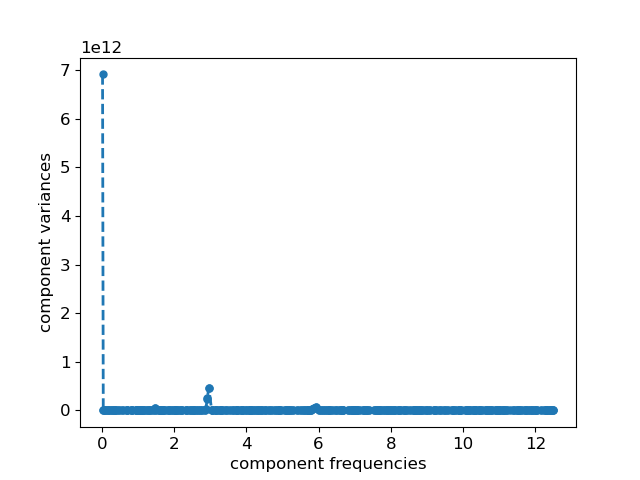

In [74]:
# First SSA decomposition to extract long term drift from accelerometer
Y_acc1, fc_acc1, sig_acc1 = ssa_decomposition(acc_norm, L, fs, 2)

Text(0.5, 0, 'Time (s)')

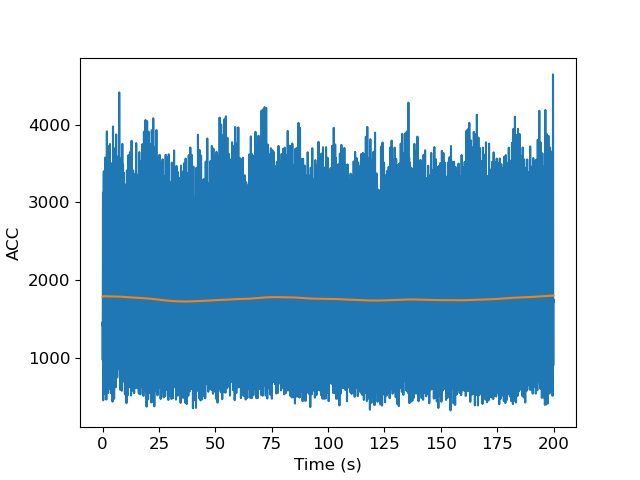

In [75]:
fig = plt.figure()
plt.plot(time, acc_norm)
plt.plot(time, Y_acc1[:, 0].flatten(), label='baseline')
plt.ylabel('ACC')
plt.xlabel('Time (s)')

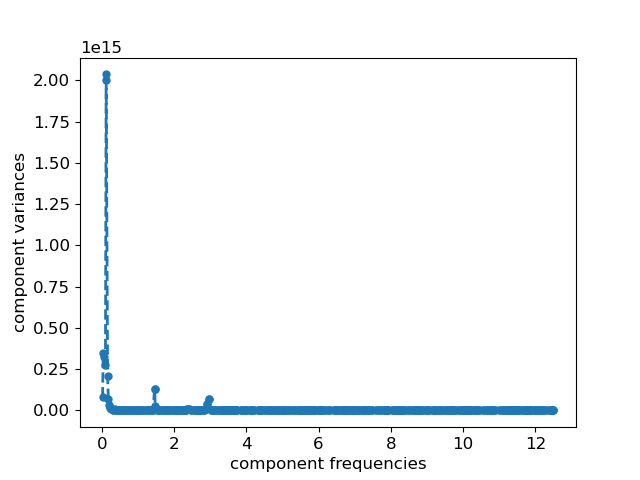

In [76]:
# Remove First component
filt_x = ppg - Y_1[:, 0]

'''Q3.2'''
# Apply SSA on signal without baseline
# Set L to identify and remove respiration component
Y_2, fc_2, sig_2 = ssa_decomposition(filt_x, L, fs, 2)

In [ ]:
# Finding components related to respiration
print("Component index  |  Frequency (Hz)")
for i, f in enumerate(fc_2.flatten()):
    print(i, "  |  ", f)

Component index  |  Frequency (Hz)
0   |   0.12
1   |   0.12
2   |   0.04
3   |   0.06
4   |   0.1
5   |   0.16
6   |   1.46
7   |   1.46
8   |   0.02
9   |   2.96
10   |   2.96
11   |   0.18
12   |   2.92
13   |   2.92
14   |   0.2
15   |   1.48
16   |   1.48
17   |   0.22
18   |   0.24
19   |   2.42
20   |   2.42
21   |   2.36
22   |   2.36
23   |   0.26
24   |   2.88
25   |   2.88
26   |   0.36
27   |   0.38
28   |   0.56
29   |   0.56
30   |   0.3
31   |   0.3
32   |   0.4
33   |   0.42
34   |   2.32
35   |   2.32
36   |   0.6
37   |   0.52
38   |   0.46
39   |   0.48
40   |   0.5
41   |   0.62
42   |   2.84
43   |   2.84
44   |   1.42
45   |   1.42
46   |   0.66
47   |   1.36
48   |   1.36
49   |   0.66
50   |   5.92
51   |   5.92
52   |   0.8
53   |   4.42
54   |   4.42
55   |   0.8
56   |   2.82
57   |   3.02
58   |   0.7000000000000001
59   |   0.9400000000000001
60   |   0.86
61   |   3.06
62   |   3.06
63   |   3.06
64   |   1.54
65   |   1.54
66   |   0.9400000000000001
67  

Text(0.5, 0, 'Time (s)')

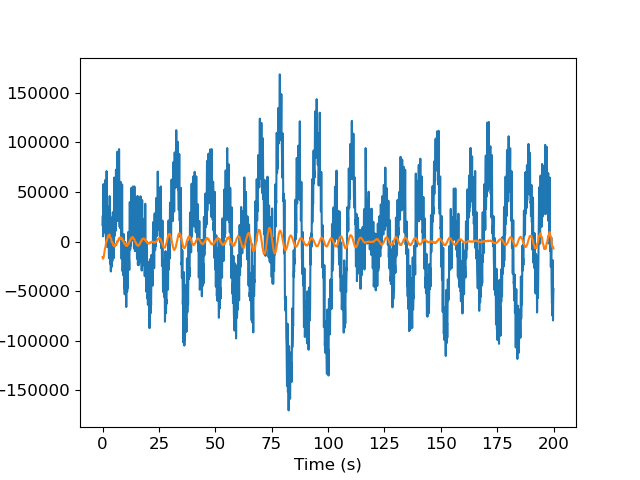

In [78]:
# Find components characterizing respiration
resp_components = [14, 17, 18]
fig = plt.figure()
plt.plot(time, filt_x)
plt.plot(time, np.sum(Y_2[:, resp_components], axis=1), label='Respiration')
plt.ylabel('PPG')
plt.xlabel('Time (s)')

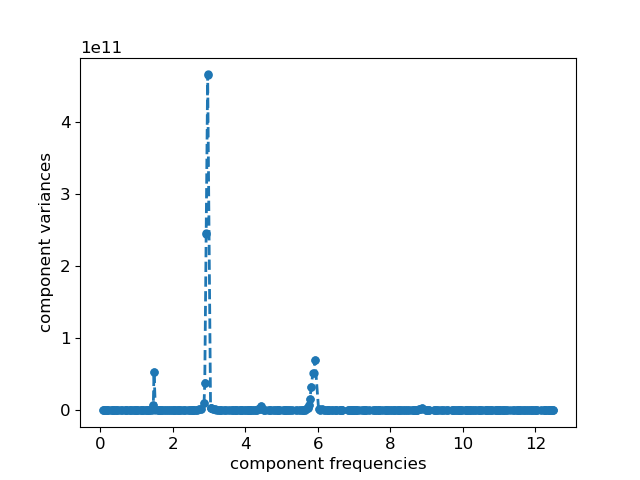

In [79]:
# Remove First component
filt_acc = acc_norm - Y_acc1[:, 0]
# Apply SSA on accelerometer norm without baseline
Y_acc2, fc_acc2, sig_acc2 = ssa_decomposition(filt_acc, L, fs, 2)

In [80]:
print("ACC component index  |  Frequency (Hz)")
for i, f in enumerate(fc_acc2.flatten()):
    print(i, "  |  ", f)

ACC component index  |  Frequency (Hz)
0   |   2.96
1   |   2.96
2   |   2.92
3   |   2.92
4   |   5.92
5   |   5.92
6   |   1.48
7   |   1.48
8   |   5.86
9   |   5.88
10   |   2.88
11   |   2.88
12   |   5.82
13   |   5.82
14   |   5.78
15   |   5.78
16   |   2.86
17   |   2.86
18   |   1.46
19   |   1.46
20   |   5.76
21   |   5.76
22   |   4.44
23   |   4.44
24   |   3.04
25   |   3.04
26   |   5.72
27   |   5.72
28   |   8.88
29   |   8.88
30   |   3.06
31   |   3.06
32   |   5.7
33   |   5.7
34   |   4.4
35   |   4.4
36   |   2.7800000000000002
37   |   2.7800000000000002
38   |   8.8
39   |   8.8
40   |   3.16
41   |   3.16
42   |   6.0200000000000005
43   |   6.0200000000000005
44   |   2.72
45   |   2.72
46   |   6.12
47   |   6.12
48   |   8.84
49   |   8.84
50   |   4.36
51   |   4.36
52   |   3.12
53   |   3.12
54   |   6.0600000000000005
55   |   6.0600000000000005
56   |   5.64
57   |   5.64
58   |   5.6000000000000005
59   |   5.6000000000000005
60   |   5.60000000000000

Text(0.5, 0, 'Time (s)')

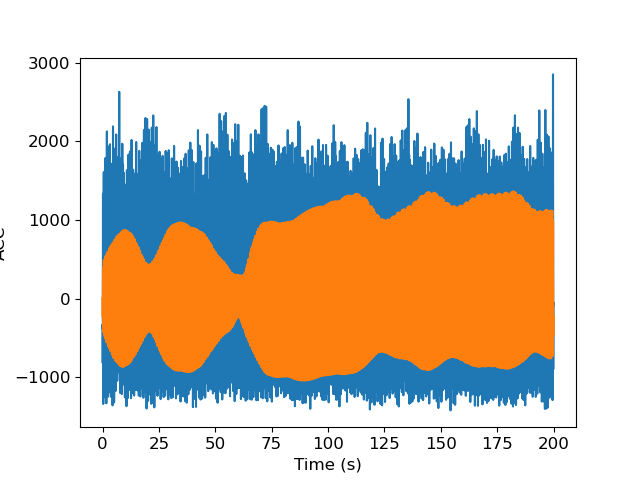

In [83]:
# Find components characterizing respiration
cadence_components = [0, 1, 3, 4]
fig = plt.figure()
plt.plot(time, filt_acc)
plt.plot(time, np.sum(Y_acc2[:, cadence_components], axis=1), label='Cadence')
plt.ylabel('ACC')
plt.xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

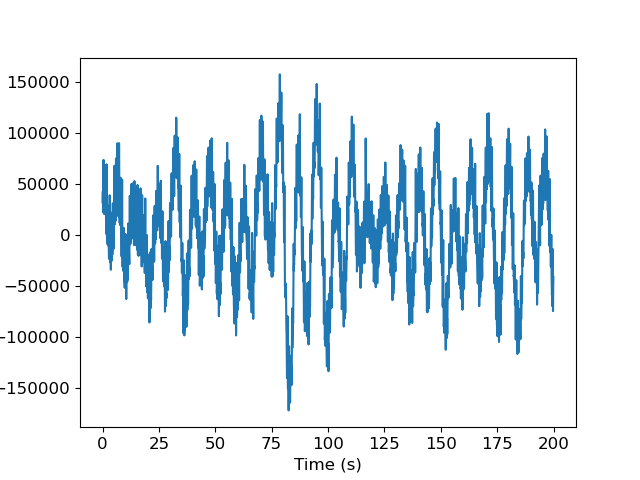

In [89]:
# Remove respiration component(s)
filt_x2 = filt_x - np.sum(Y_2[:, resp_components], 1)
fig = plt.figure()
plt.plot(time, filt_x2)
plt.ylabel('PPG')
plt.xlabel('Time (s)')

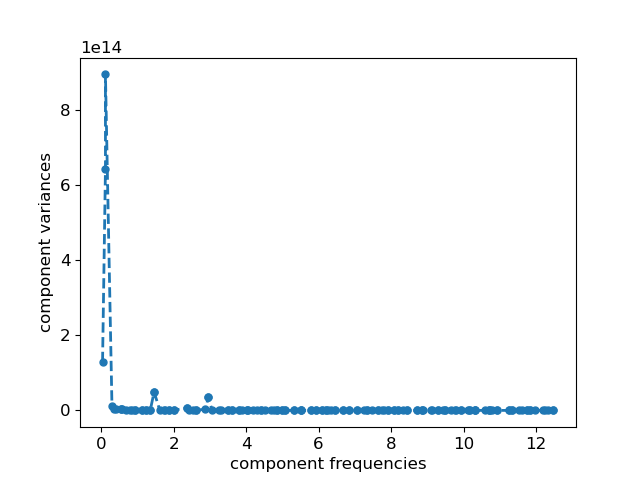

In [90]:
# Apply SSA on signal without baseline, nor respiration
# Set L to identify running cadence and heart rate

Y_3, fc_3, sig_3 = ssa_decomposition(filt_x2, L, fs, 2)

In [92]:
print("HR candidate components  |  Frequency (Hz)")
for i, f in enumerate(fc_3.flatten()):
    print(i, "  |  ", f)

HR candidate components  |  Frequency (Hz)
0   |   0.12
1   |   0.12
2   |   0.04
3   |   1.46
4   |   1.46
5   |   2.96
6   |   2.96
7   |   0.3
8   |   2.36
9   |   2.36
10   |   0.36
11   |   0.4
12   |   0.56
13   |   0.56
14   |   2.88
15   |   0.58
16   |   1.36
17   |   1.36
18   |   0.68
19   |   2.42
20   |   2.54
21   |   0.8
22   |   0.86
23   |   0.9400000000000001
24   |   5.92
25   |   5.92
26   |   4.42
27   |   4.42
28   |   0.9400000000000001
29   |   3.06
30   |   1.24
31   |   1.24
32   |   1.12
33   |   7.34
34   |   1.12
35   |   7.34
36   |   2.62
37   |   2.62
38   |   4.7
39   |   4.76
40   |   1.62
41   |   1.74
42   |   1.76
43   |   1.8800000000000001
44   |   1.8800000000000001
45   |   4.84
46   |   4.84
47   |   8.84
48   |   8.84
49   |   5.8
50   |   8.88
51   |   7.24
52   |   2.0
53   |   2.0
54   |   3.24
55   |   5.8
56   |   3.3000000000000003
57   |   4.3
58   |   4.5200000000000005
59   |   3.5
60   |   3.5
61   |   3.62
62   |   3.62
63   |   5.3

Text(0.5, 0, 'Time (s)')

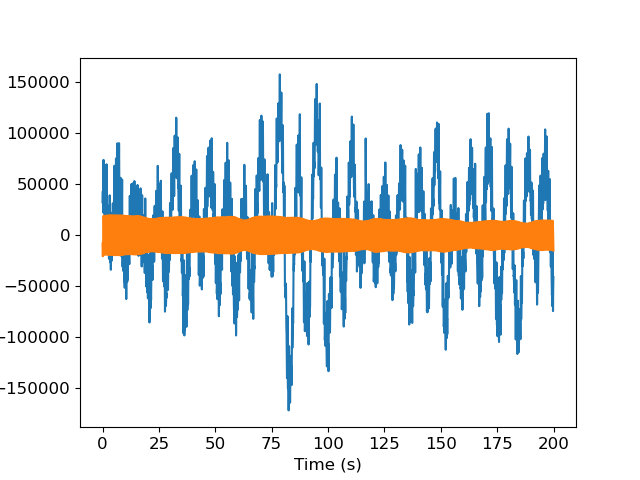

In [95]:
hr_components = [3, 4]
fig = plt.figure()
plt.plot(time, filt_x2)
plt.plot(time, np.sum(Y_3[:, hr_components], axis=1))
plt.ylabel('PPG')
plt.xlabel('Time (s)')

In [ ]:
f_hr = fc_3[hr_components[0]]
HR_bpm = f_hr * 60
print("Heart rate =", HR_bpm, "bpm")

Heart rate ≈ [87.6] bpm
